# DTEK0042 Exercise 2
    Group Members:
    1. Juha, Virta
    2. Amin, Rezaei
    3. YU-HAO, TSAI

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

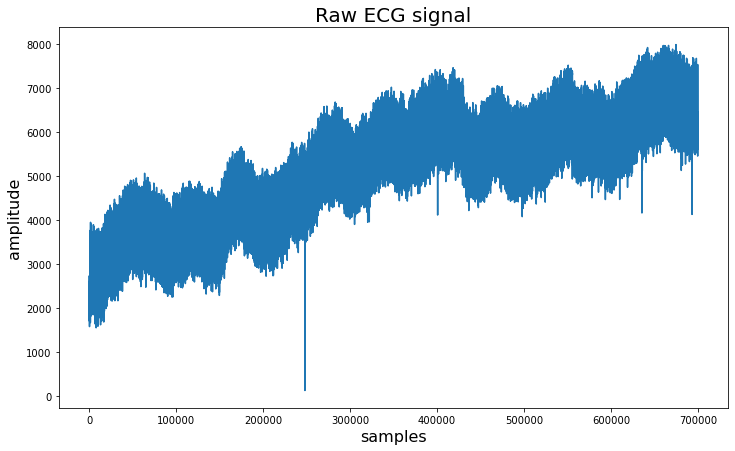

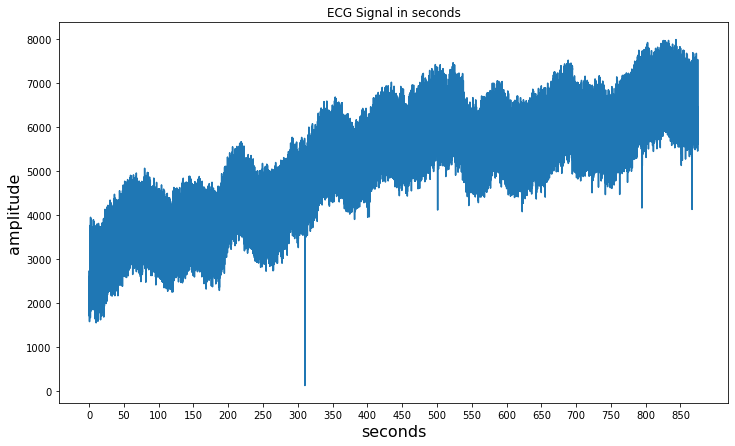

In [2]:
ECG_sig = np.loadtxt('ECG_800hz.txt')
Fs = 800


###_ECG signal in samples_###
plt.figure(figsize=(12,7))
plt.plot(ECG_sig)
plt.title("Raw ECG signal",fontsize=20)
plt.xlabel("samples",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.show()


###_ECG signal in seconds_###
seconds_time=np.linspace(0,(len(ECG_sig)/Fs),len(ECG_sig))

plt.figure(figsize=(12,7))
plt.plot(seconds_time,ECG_sig)
plt.title("ECG Signal in seconds")
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(ECG_sig)/Fs)+1,step=50))
plt.show()

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

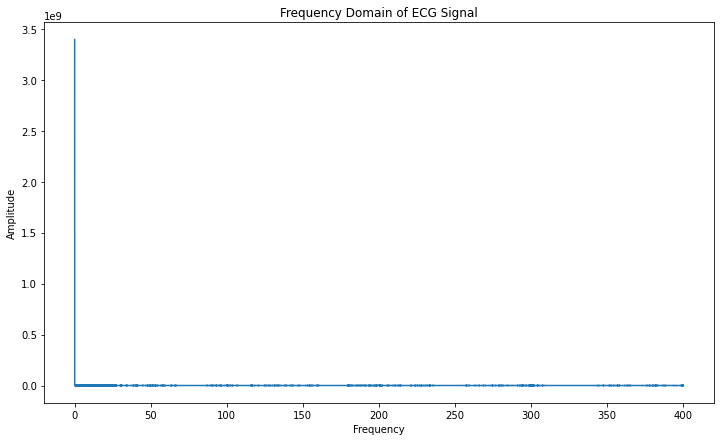

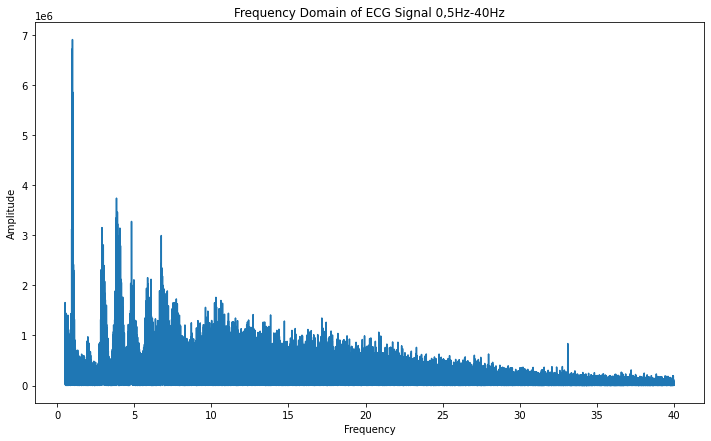

In [3]:
import scipy.fftpack as fftpack

###_function to find indexes of frequncies_###
def find_index_range(data,low_limit,high_limit):
    count = 0
    indexl = 0
    indexu = 0
    for i in fx:
        if i <= low_limit:
            indexl = count
        if i > high_limit:
            indexu = count
            break
        count += 1
    return(indexl,indexu)

###_function for fourier transform_###
def fourier_transform(data, fs):
    sig_len=len(data)
    fx = fx=fftpack.rfftfreq(sig_len,1/fs)
    fy=np.abs(fftpack.rfft(data))
    return(fx,fy)

###_frequency domain of ECG signal_###
fx, fy = fourier_transform(ECG_sig, Fs)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of ECG Signal")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx,np.abs(fy))

plt.show()
        
###_frequency domain of ECG signal (0,5-40Hz)_###
fx, fy = fourier_transform(ECG_sig, Fs)
index_low, index_high = find_index_range(fx,0.5,40)

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of ECG Signal 0,5Hz-40Hz")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))

plt.show()



# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

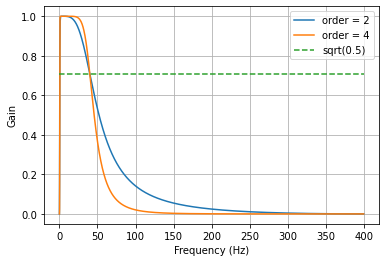

In [4]:
# https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
from scipy import signal
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = Fs
    lowcut = 0.5
    highcut = 40

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [2, 4]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order) #***
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order) #***

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()

run()


## Observations:
The larger the order is, the more ideal the result is.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

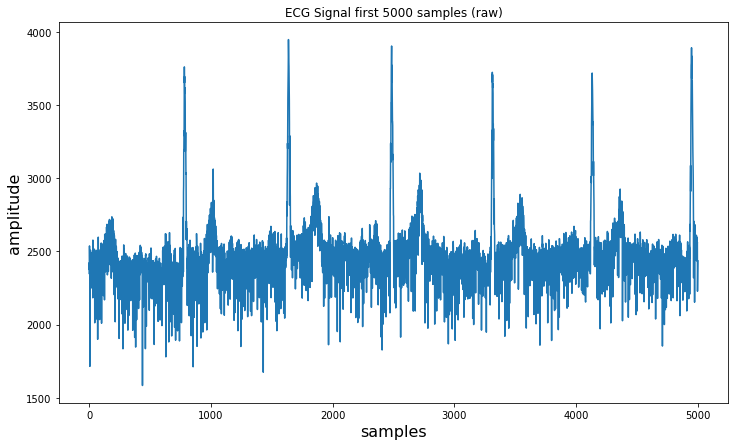

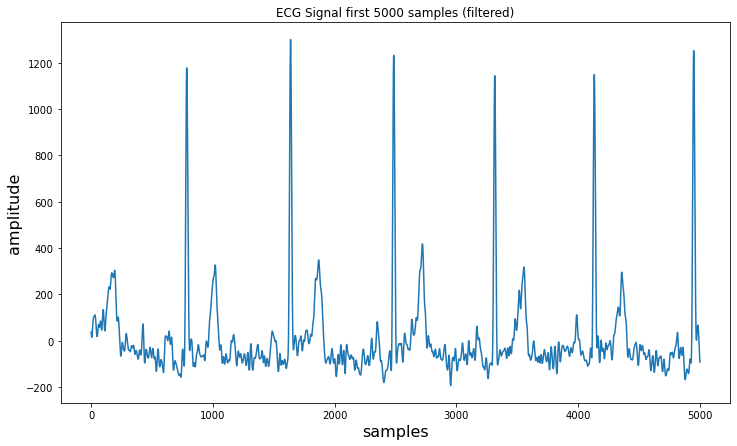

In [5]:
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 800
    lowcut = 0.5
    highcut = 40

    # Plot the frequency response for a few different orders.
    b, a = butter_bandpass(0.5, 40, fs, 4) #***
    output_signal = filtfilt(b, a, ECG_sig)

    ECG_sig2 = ECG_sig[0:5000]
    output_signal2 = output_signal[0:5000]
    
    Fs=800
    seconds_time=np.linspace(0,(len(ECG_sig2)/Fs),len(ECG_sig2))

    plt.figure(figsize=(12,7))
    plt.plot(ECG_sig2)
    plt.title("ECG Signal first 5000 samples (raw)")
    plt.xlabel("samples",fontsize=16)
    plt.ylabel("amplitude",fontsize=16)
    plt.show()
    
    plt.figure(figsize=(12,7))
    plt.plot(output_signal2)
    plt.title("ECG Signal first 5000 samples (filtered)")
    plt.xlabel("samples",fontsize=16)
    plt.ylabel("amplitude",fontsize=16)
    plt.show()

run()

## Observations:
After applying the filter, the signal became more clean.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

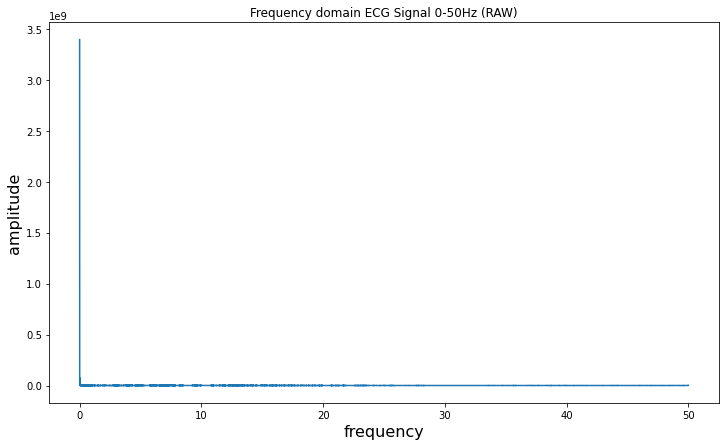

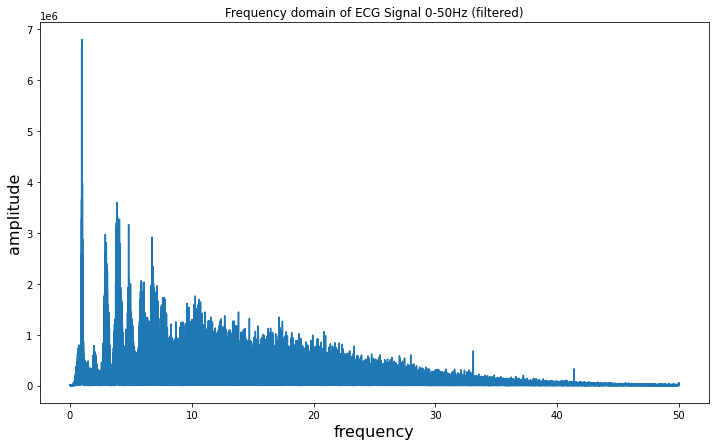

In [6]:
Fs=800
#########_Raw ECG 0-50Hz samples Frequency domain_###########
fx, fy = fourier_transform(ECG_sig, Fs)

index_low, index_high = find_index_range(fx,0,50)

plt.figure(figsize=(12,7))
plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))
plt.title("Frequency domain ECG Signal 0-50Hz (RAW)")
plt.xlabel("frequency",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.show()

"""
#########_DC removed ECG 0-50Hz samples Frequency domain_###########
ECG_meanremoved=ECG_sig-np.mean(ECG_sig)
fx, fy = fourier_transform(ECG_meanremoved, Fs)

index_low, index_high = find_index_range(fx,0,50)

plt.figure(figsize=(12,7))
plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))
plt.title("Frequency domain ECG Signal 0-50Hz (DC removed)")
plt.xlabel("frequency",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.show()
"""


#########_Filtered ECG samples Frequency domain 0-50Hz_###########
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 800
    lowcut = 0.5
    highcut = 40

    b, a = butter_bandpass(0.5, 40, fs, 4) #***
    output_signal = filtfilt(b, a, ECG_sig)
    
    fx, fy = fourier_transform(output_signal, Fs)
    index_low, index_high = find_index_range(fx,0,50)
    
    
    plt.figure(figsize=(12,7))
    plt.plot(fx[index_low:index_high],np.abs(fy[index_low:index_high]))
    plt.title("Frequency domain of ECG Signal 0-50Hz (filtered)")
    plt.xlabel("frequency",fontsize=16)
    plt.ylabel("amplitude",fontsize=16)
    plt.show()

run()




## Observations:
After filtering, we can acquire the features of this signal and its domainant frequency.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


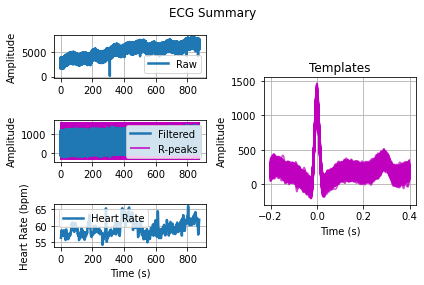

In [7]:
#still need to locally install biosppy
#!pip install biosppy
import biosppy 
from biosppy.signals import ecg 

# https://biosppy.readthedocs.io/en/stable/tutorial.html

out = ecg.ecg(ECG_sig, Fs, show=True)


## Observations:
By using the "biosppy" package, we can extract the QRS wave form area from the original ECG signal.